In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
Data = pd.read_csv("winequality-red.csv")

In [3]:
Data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   
1599            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   
1599                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  
1599     10.2        5  

[1600 rows x 12 columns]

In [4]:
Data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
Data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1600.000000       1600.000000  1600.000000     1600.000000   
mean        8.318125          0.527894     0.270881        2.538469   
std         1.741603          0.179028     0.194777        1.409551   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1600.000000          1600.000000           1600.000000  1600.000000   
mean      0.087459            15.885000             46.466250     0.996746   
std       0.047052            10.464653             32.885095     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997833   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1600.000000  1600.000000  1600.000000  1600.000000  
mean      3.311275     0.658181    10.422844     5.635625  
std       0.154474     0.169459     1.065349     0.807473  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
Data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
px.histogram(Data, "quality",text_auto=True)

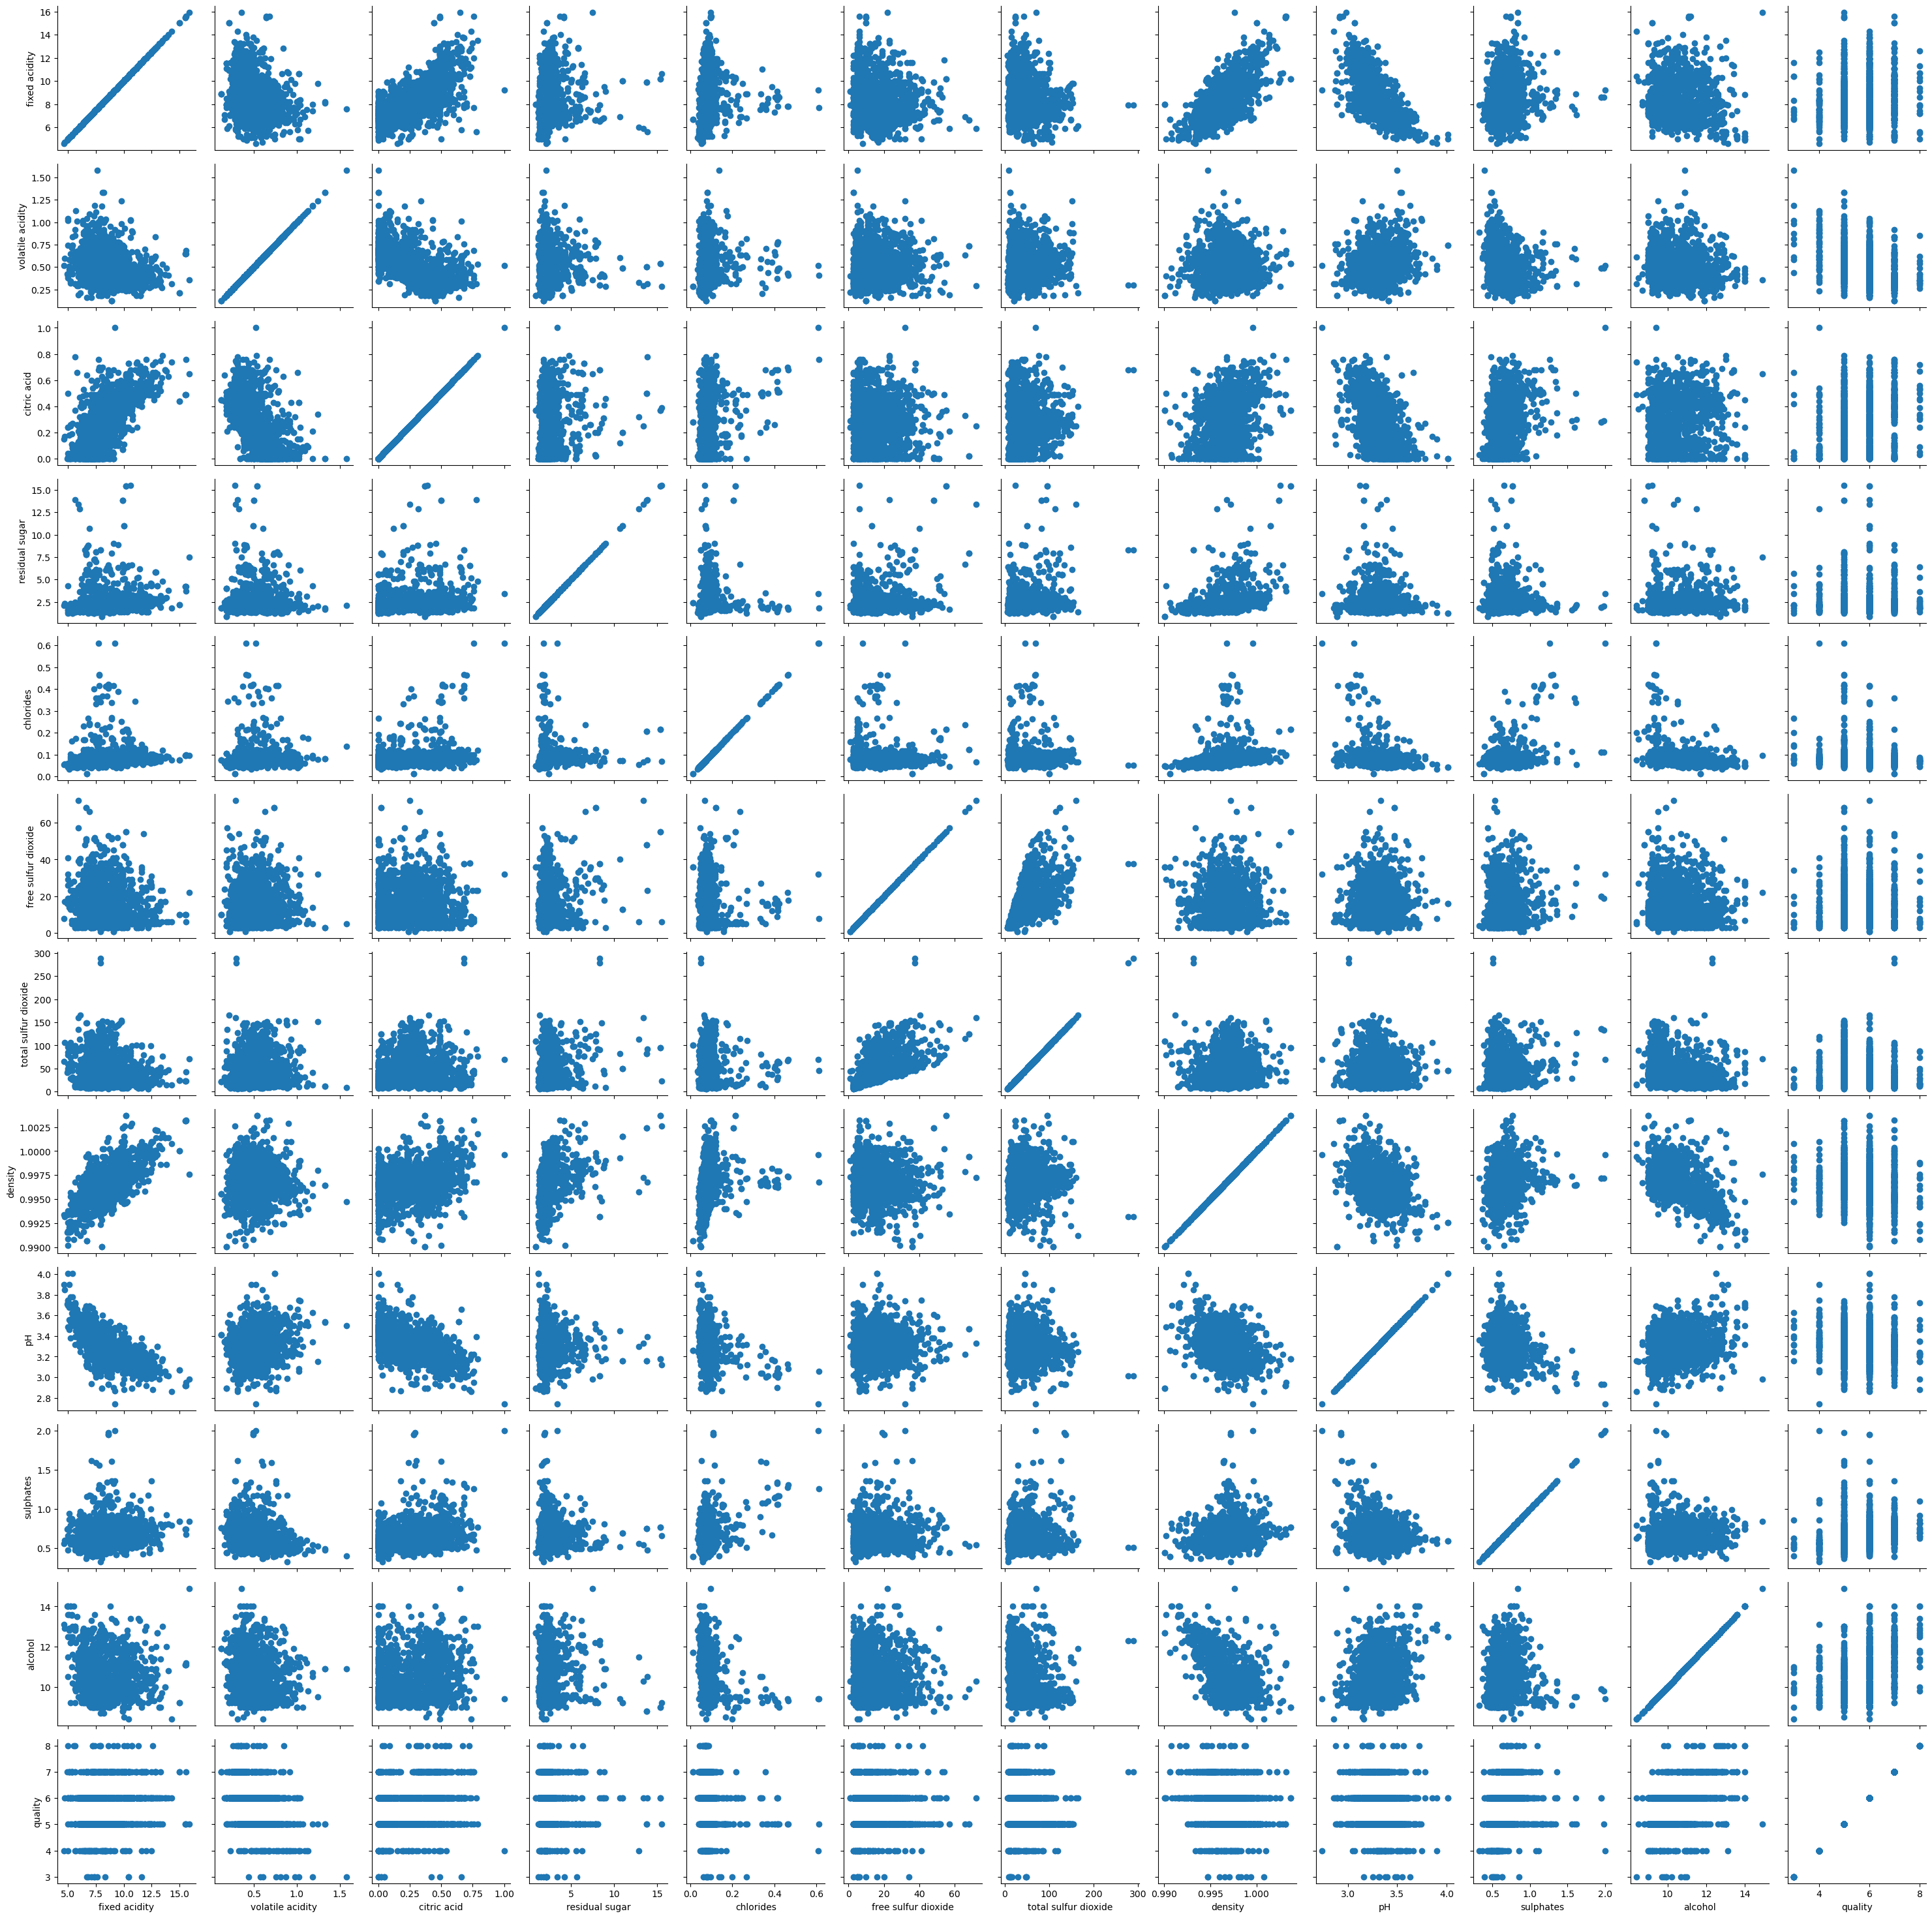

In [8]:
d = sns.PairGrid(Data)
d.map(plt.scatter)

In [9]:
x = Data.drop(axis = 1, columns = ["quality"])
y = Data["quality"]
y.value_counts()

5    682
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(x, y)

In [20]:
y

0       5
1       5
2       5
3       6
4       5
       ..
4087    8
4088    8
4089    8
4090    8
4091    8
Name: quality, Length: 4092, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4, test_size= 0.25)
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(3069, 11)
(1023, 11)
(3069,)
(1023,)


In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [21]:
X_train

array([[ 2.1938727 , -0.84057687,  1.10473056, ..., -1.1256915 ,
        -0.30460148, -0.3732517 ],
       [-1.31330314, -0.80090798,  0.80663817, ...,  0.77762758,
         1.391238  ,  0.39884331],
       [ 1.14944571,  0.11640858,  0.97121352, ..., -1.06809786,
        -0.2170796 , -1.93735859],
       ...,
       [-0.88059636,  1.31268761, -1.32969068, ...,  1.23455931,
        -0.89268342, -0.06117438],
       [-0.63647973, -0.84057687, -0.28636729, ..., -0.00995273,
        -1.21774582, -1.05955837],
       [-0.32883273, -0.36455022, -0.73350588, ..., -0.33811119,
         1.391238  , -0.80219337]])

In [89]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import cohen_kappa_score

In [78]:
def find_best_model(X_train, X_test, y_train, y_test):
    models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), XGBRegressor(), RandomForestRegressor()]
    pred = []
    for i in models:
        i.fit(X_train, y_train)
        pre = i.score(X_test, y_test)
        print("{} score is {}".format(i.__class__.__name__, pre))

In [79]:
find_best_model(X_train, X_test, y_train, y_test)

LinearRegression score is 0.7391211200945346
Ridge score is 0.7391200394938309
Lasso score is 0.137170413490026
ElasticNet score is 0.4398152287949946
XGBRegressor score is 0.9156144039525891
RandomForestRegressor score is 0.9296248502435527


In [82]:
xg = XGBRegressor()
xgm = xg.fit(X_train, y_train)
xgm.score(X_test, y_test)

0.9156144039525891

In [84]:
from sklearn.model_selection import GridSearchCV
params_best_xgb = {'n_estimators':np.arange(200,500,100), 'max_depth':np.arange(2,5,1), 
                    'subsample':[0.7,0.8],
                  'min_child_weight':np.arange(2,4,1),'max_delta_step':np.arange(1,4,1)}


## Intitalize the GridSearchCV and Fit the Data
grid_xgb = GridSearchCV(estimator=xgm, param_grid=params_best_xgb, cv=5, 
                        n_jobs=-1)
grid_xgb.fit(X_train, y_train)  ## train

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [85]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'max_delta_step': 1, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 400, 'subsample': 0.7}
best_xgb --  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
             max_depth=4, max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)


In [93]:
# function to return kappa score 
def kappa(estimator,X,y):
    y_predict = estimator.predict(X)
    y_predict = np.round(y_predict,decimals=0).astype(int)
    score = cohen_kappa_score(y,y_predict,weights='quadratic')
    return score

In [94]:
score_best_xgb_regressor = kappa(best_xgb,X_test,y_test)
print('Best XGB Regressor score = ',score_best_xgb_regressor)

Best XGB Regressor score =  0.9518192165867655
